<a href="https://colab.research.google.com/github/PravinVenkatraman/Forsk_Project/blob/main/PlayingCards_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

# Cloning TensorFlow Model Zoo and installing associated dependencies

In [ ]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 64927, done.
remote: Counting objects: 100% (663/663), done.
remote: Compressing objects: 100% (138/138), done.
remote: Total 64927 (delta 531), reused 652 (delta 525), pack-reused 64264
Receiving objects: 100% (64927/64927), 575.27 MiB | 27.04 MiB/s, done.
Resolving deltas: 100% (45455/45455), done.


In [ ]:
cd /content/models/research

/content/models/research


In [ ]:
!protoc object_detection/protos/*.proto --python_out=.  #Protobuff installation for TFRecords 

In [ ]:
!git clone https://github.com/cocodataset/cocoapi.git   

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 12.56 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [ ]:
cd cocoapi/PythonAPI

/content/models/research/cocoapi/PythonAPI


In [ ]:
!make

python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/models/research/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-Y7dWVB/python3.7-3.7.12=. -fstack-protector-strong -Wformat -Werror=format-security -g -fdebug-prefix-map=/build/python3.7-Y7dWVB/python3.7-3.7.12=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.7/dist-packages/n

In [ ]:
cp -r pycocotools /content/models/research

In [ ]:
cd /content/models/research

/content/models/research


In [ ]:
cp object_detection/packages/tf2/setup.py .

In [ ]:
!python -m pip install --use-feature=2020-resolver .

Processing /content/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 9.8 MB 14.0 MB/s 
     |████████████████████████████████| 352 kB 40.1 MB/s 
     |████████████████████████████████| 1.8 MB 31.2 MB/s 
     |████████████████████████████████| 37.1 MB 50 kB/s 
     |████████████████████████████████| 213 kB 48.0 MB/s 
     |████████████████████████████████| 90 kB 11.2 MB/s 
     |████████████████████████████████| 43 kB 2.3 MB/s 
     |████████████████████████████████| 596 kB 42.8 MB/s 
     |████████████████████████████████| 1.2 MB 34.9 MB/s 
     |████████████████████████████████| 4.4 MB 33.

In [ ]:
!python object_detection/builders/model_builder_tf2_test.py

2021-10-15 07:45:33.910806: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-15 07:45:34.320783: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-15 07:45:34.321737: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
Running tests under Python 3.7.12: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-10-15 07:45:34.340333: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021

# Creating the training workspace

In [ ]:
cd /content

/content


In [ ]:
!mkdir training_demo

In [ ]:
cd /content/training_demo

/content/training_demo


In [ ]:
!mkdir annotations

In [ ]:
!mkdir exported-models

In [ ]:
!mkdir images

In [ ]:
!mkdir models

In [ ]:
!mkdir pre-trained-models


In [ ]:
!mkdir dummy

In [ ]:
!unzip /content/drive/MyDrive/Datasets/archive.zip -d /content/training_demo/dummy

Archive:  /content/drive/MyDrive/Datasets/archive.zip
  inflating: /content/training_demo/dummy/card_dataset/test/IMG_2383.JPG  
  inflating: /content/training_demo/dummy/card_dataset/test/IMG_2383.xml  
  inflating: /content/training_demo/dummy/card_dataset/test/IMG_2384.JPG  
  inflating: /content/training_demo/dummy/card_dataset/test/IMG_2384.xml  
  inflating: /content/training_demo/dummy/card_dataset/test/IMG_2387.JPG  
  inflating: /content/training_demo/dummy/card_dataset/test/IMG_2387.xml  
  inflating: /content/training_demo/dummy/card_dataset/test/IMG_2391.JPG  
  inflating: /content/training_demo/dummy/card_dataset/test/IMG_2391.xml  
  inflating: /content/training_demo/dummy/card_dataset/test/IMG_2395.JPG  
  inflating: /content/training_demo/dummy/card_dataset/test/IMG_2395.xml  
  inflating: /content/training_demo/dummy/card_dataset/test/IMG_2403.JPG  
  inflating: /content/training_demo/dummy/card_dataset/test/IMG_2403.xml  
  inflating: /content/training_demo/dummy/card

In [ ]:
cp -a /content/training_demo/dummy/train /content/training_demo/images

In [ ]:
cp -a /content/training_demo/dummy/test /content/training_demo/images

In [ ]:
cd /content/training_demo/pre-trained-models

/content/training_demo/pre-trained-models


# Downloading and extracting the model (SSD_MobileNet)

In [ ]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8.tar.gz

--2021-10-15 07:46:18--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.206.128, 2a00:1450:400c:c04::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.206.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 90453990 (86M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8.tar.gz’

ssd_mobilenet_v1_fp 100%[===================>]  86.26M  82.3MB/s    in 1.0s    

2021-10-15 07:46:19 (82.3 MB/s) - ‘ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8.tar.gz’ saved [90453990/90453990]



In [ ]:
!tar -xvf ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8.tar.gz

ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/checkpoint/
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/pipeline.config
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/saved_model/
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/saved_model/saved_model.pb
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.index


In [ ]:
cd /content/training_demo/models

/content/training_demo/models


In [ ]:
!mkdir my_ssd_mobilenet_v1_fpn

# Copying the required scripts and label maps from GDrive to workspace

In [ ]:
cp -a /content/drive/MyDrive/accessories/generate_tfrecord.py /content/training_demo

In [ ]:
cp -a /content/drive/MyDrive/accessories/model_main_tf2.py /content/training_demo

In [ ]:
cp -a /content/drive/MyDrive/accessories/label_map.pbtxt /content/training_demo/annotations

In [ ]:
cp -a /content/drive/MyDrive/accessories/pipeline.config /content/training_demo/models/my_ssd_mobilenet_v1_fpn

In [ ]:
cd /content/training_demo

/content/training_demo


# Generating TFRecords from XMLs

In [ ]:
!python generate_tfrecord.py -x /content/training_demo/images/train -l /content/training_demo/annotations/label_map.pbtxt -o /content/training_demo/annotations/train.record

Successfully created the TFRecord file: /content/training_demo/annotations/train.record


In [ ]:
!python generate_tfrecord.py -x /content/training_demo/images/test -l /content/training_demo/annotations/label_map.pbtxt -o /content/training_demo/annotations/test.record

Successfully created the TFRecord file: /content/training_demo/annotations/test.record


# Model Training

* Model = SSD_MobileNet_v1
* Batch Size = 4 (Due to memory restrictions)
* Num_Classes = 6
* Detection Problem

In [ ]:
cd /content/training_demo

/content/training_demo


In [ ]:
!python model_main_tf2.py --model_dir=models/my_ssd_mobilenet_v1_fpn --pipeline_config_path=models/my_ssd_mobilenet_v1_fpn/pipeline.config

2021-10-15 07:50:53.449318: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-15 07:50:53.459749: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-15 07:50:53.460643: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-15 07:50:53.462213: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-15 07:50:53.463038: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

# Exporting the model

In [ ]:
cp -a /content/models/research/object_detection/exporter_main_v2.py /content/training_demo

In [ ]:
cd /content/training_demo/exported-models

/content/training_demo/exported-models


In [ ]:
!mkdir my_model

In [ ]:
cd /content/training_demo

/content/training_demo


In [ ]:
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path /content/training_demo/models/my_ssd_mobilenet_v1_fpn/pipeline.config --trained_checkpoint_dir /content/training_demo/models/my_ssd_mobilenet_v1_fpn --output_directory /content/training_demo/exported-models/my_model

2021-10-15 10:53:55.260325: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-15 10:53:55.270320: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-15 10:53:55.271309: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-15 10:53:55.281813: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-15 10:53:55.282618: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

# Inference

Loading model...Done! Took 13.916011571884155 seconds
Running inference for /content/training_demo/images/test/IMG_2391.JPG... Done


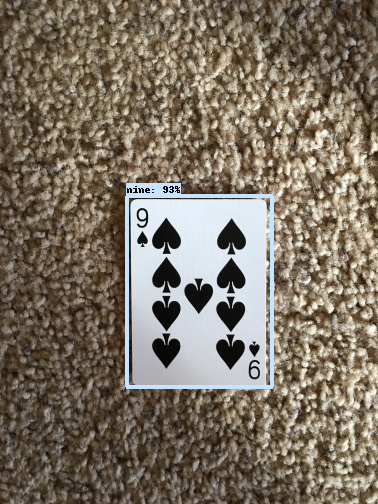

In [ ]:
"""
Object Detection (On Single Image) From TF2 Saved Model
=====================================
"""

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf
import cv2
import argparse
from google.colab.patches import cv2_imshow

# Enable GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# PROVIDE PATH TO IMAGE DIRECTORY
IMAGE_PATHS = '/content/training_demo/images/test/IMG_2391.JPG'


# PROVIDE PATH TO MODEL DIRECTORY
PATH_TO_MODEL_DIR = '/content/training_demo/exported-models/my_model'

# PROVIDE PATH TO LABEL MAP
PATH_TO_LABELS = '/content/training_demo/annotations/label_map.pbtxt'

# PROVIDE THE MINIMUM CONFIDENCE THRESHOLD
MIN_CONF_THRESH = float(0.60)

# LOAD THE MODEL

import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

print('Loading model...', end='')
start_time = time.time()

# LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

# LOAD LABEL MAP DATA FOR PLOTTING

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.
    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.
    Args:
      path: the file path to the image
    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))




print('Running inference for {}... '.format(IMAGE_PATHS), end='')

image = cv2.imread(IMAGE_PATHS)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

# input_tensor = np.expand_dims(image_np, 0)
detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_with_detections = image.copy()

# SET MIN_SCORE_THRESH BASED ON YOU MINIMUM THRESHOLD FOR DETECTIONS
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=0.5,
      agnostic_mode=False)

print('Done')
# DISPLAYS OUTPUT IMAGE
cv2_imshow(image_with_detections)
# CLOSES WINDOW ONCE KEY IS PRESSED


In [ ]:
cp -a /content/training_demo/exported-models /content/drive/MyDrive/accessories